# Bank Premium Prediction

# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import numpy as np

# Reading the data

In [2]:
train = pd.read_csv('Bank_premium_prediction.csv')

In [3]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [4]:
train.shape

(79853, 12)

# Variable Identification

In [5]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [6]:
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

Removing id column as not required for prediction   

In [7]:
train = train.drop('id',1)

In [8]:
train.dtypes

perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

# Univariate Analysis

In [9]:
train.describe()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


<AxesSubplot:ylabel='Frequency'>

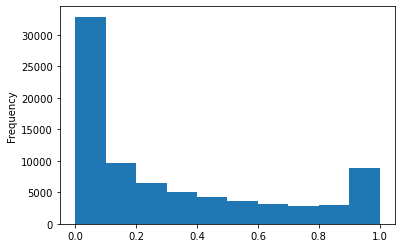

In [10]:
train['perc_premium_paid_by_cash_credit'].plot.hist()

<AxesSubplot:>

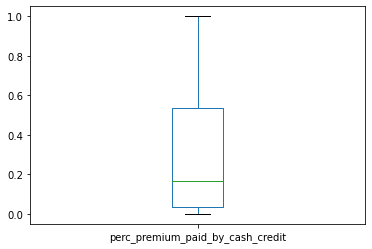

In [11]:
train['perc_premium_paid_by_cash_credit'].plot.box()

<AxesSubplot:ylabel='Frequency'>

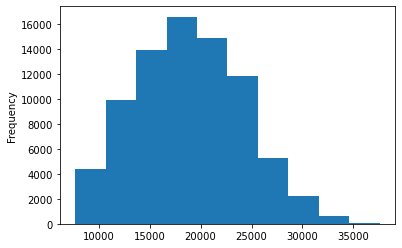

In [12]:
train['age_in_days'].plot.hist()

<AxesSubplot:>

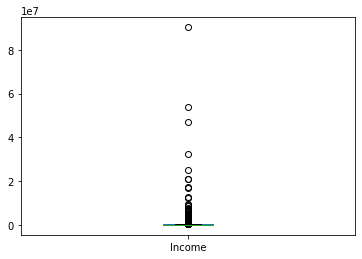

In [13]:
train['Income'].plot.box()

<AxesSubplot:ylabel='Frequency'>

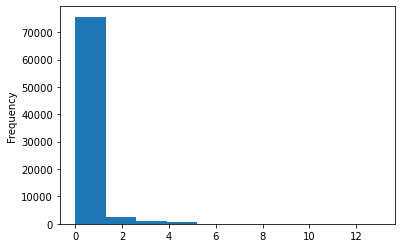

In [14]:
train['Count_3-6_months_late'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

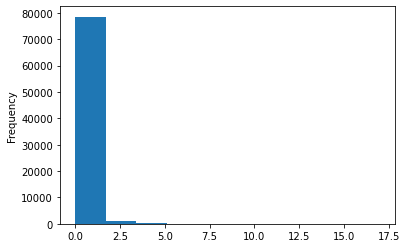

In [15]:
train['Count_6-12_months_late'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

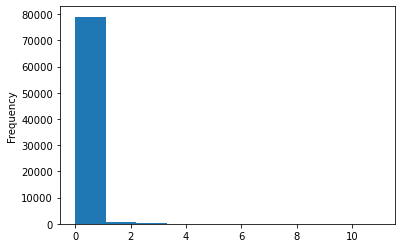

In [16]:
train['Count_more_than_12_months_late'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

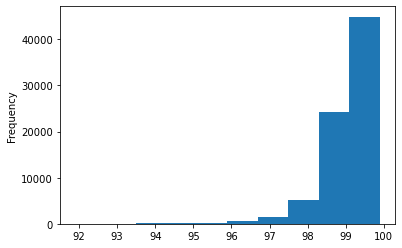

In [17]:
train['application_underwriting_score'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

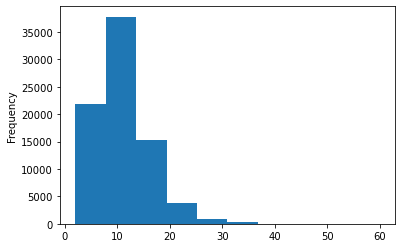

In [18]:
train['no_of_premiums_paid'].plot.hist()

In [19]:
train['residence_area_type'].value_counts()

Urban    48183
Rural    31670
Name: residence_area_type, dtype: int64

<AxesSubplot:>

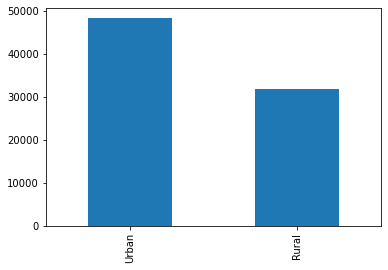

In [20]:
train['residence_area_type'].value_counts().plot.bar()

# Bivariate Analysis

In [21]:
train.corr()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
perc_premium_paid_by_cash_credit,1.000000,-0.259131,-0.031868,0.214470,0.214951,0.168125,-0.142670,-0.152837,-0.240980
age_in_days,-0.259131,1.000000,0.029308,-0.058366,-0.072731,-0.059407,0.049888,0.176544,0.095103
Income,-0.031868,0.029308,1.000000,-0.001403,-0.017347,-0.012399,0.085746,0.079078,0.016541
Count_3-6_months_late,0.214470,-0.058366,-0.001403,1.000000,0.204228,0.296085,-0.082781,0.075828,-0.248900
Count_6-12_months_late,0.214951,-0.072731,-0.017347,0.204228,1.000000,0.266306,0.004785,-0.093133,-0.286159
Count_more_than_12_months_late,0.168125,-0.059407,-0.012399,0.296085,0.266306,1.000000,-0.031726,-0.021848,-0.240385
application_underwriting_score,-0.142670,0.049888,0.085746,-0.082781,0.004785,-0.031726,1.000000,-0.270864,0.068715
no_of_premiums_paid,-0.152837,0.176544,0.079078,0.075828,-0.093133,-0.021848,-0.270864,1.000000,0.022664
target,-0.240980,0.095103,0.016541,-0.248900,-0.286159,-0.240385,0.068715,0.022664,1.000000


<AxesSubplot:>

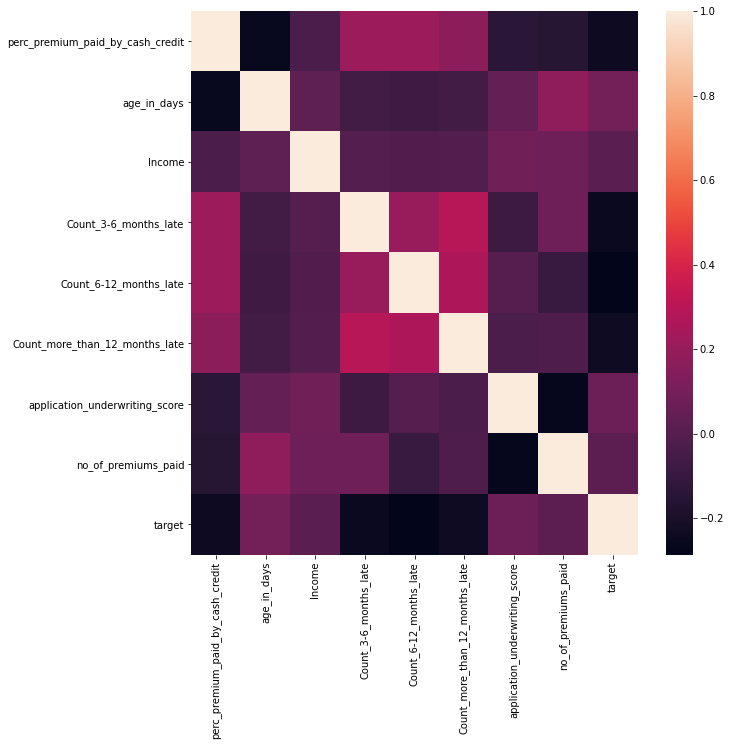

In [22]:
plt.figure(figsize=(10,10))
sn.heatmap(train.corr())

In [23]:
pd.crosstab(train['residence_area_type'],train['target'])

target,0,1
residence_area_type,,
Rural,1998,29672
Urban,3000,45183


In [24]:
train.groupby('target')['age_in_days'].mean()

target
0    16929.642657
1    18974.696867
Name: age_in_days, dtype: float64

In [25]:
train.groupby('target')['Income'].mean()

target
0    177058.799520
1    210969.651727
Name: Income, dtype: float64

# Missing Value Treatment

In [26]:
train.describe()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


In [27]:
train.isnull().sum()

perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

We use to add a mean,mode or median value at the missing place  

In [28]:
train['Count_3-6_months_late'] = train['Count_3-6_months_late'].fillna(train['Count_3-6_months_late'].mean())

In [29]:
train['Count_6-12_months_late'] = train['Count_6-12_months_late'].fillna(train['Count_6-12_months_late'].mean())

In [30]:
train['Count_more_than_12_months_late'] = train['Count_more_than_12_months_late'].fillna(train['Count_more_than_12_months_late'].mean())

In [31]:
train['application_underwriting_score'] = train['application_underwriting_score'].fillna(train['application_underwriting_score'].mean())

In [32]:
train.isnull().sum()

perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

# Outlier Treatment

<AxesSubplot:>

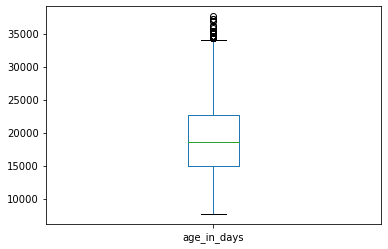

In [33]:
train['age_in_days'].plot.box()

In [34]:
train.loc[train['age_in_days']>34000,'age_in_days']=np.mean(train['age_in_days'])

<AxesSubplot:>

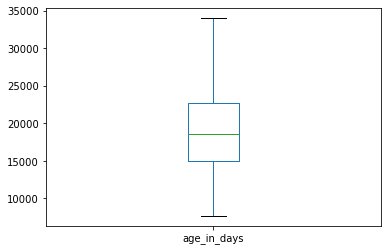

In [35]:
train['age_in_days'].plot.box()

<AxesSubplot:>

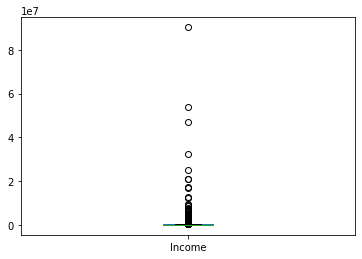

In [36]:
train['Income'].plot.box()

In [37]:
train.loc[train['Income']>400710,'Income']=np.mean(train['Income'])

<AxesSubplot:>

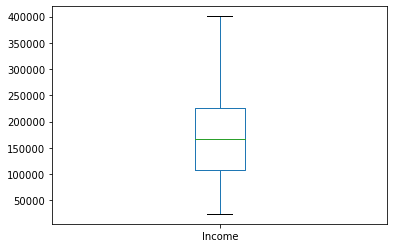

In [38]:
train['Income'].plot.box()

<AxesSubplot:>

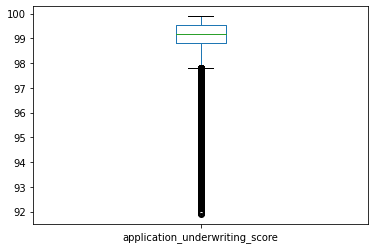

In [39]:
train['application_underwriting_score'].plot.box()

In [40]:
train.loc[train['application_underwriting_score']<98.5,'application_underwriting_score']=np.mean(train['application_underwriting_score'])

<AxesSubplot:>

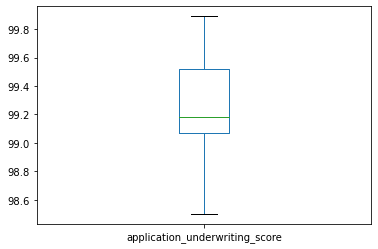

In [41]:
train['application_underwriting_score'].plot.box()

<AxesSubplot:xlabel='age_in_days', ylabel='Income'>

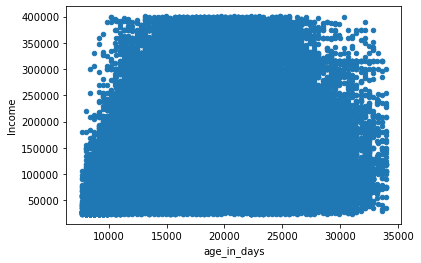

In [42]:
train.plot.scatter('age_in_days','Income')

# Variable Transformtaion

<AxesSubplot:ylabel='Frequency'>

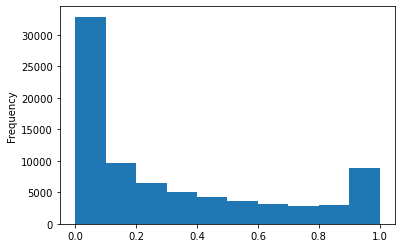

In [43]:
train['perc_premium_paid_by_cash_credit'].plot.hist()

In [44]:
train['perc_premium_paid_by_cash_credit'] = np.sqrt(train['perc_premium_paid_by_cash_credit'])

<AxesSubplot:ylabel='Frequency'>

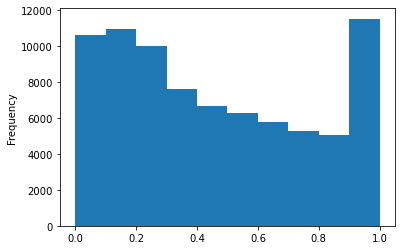

In [45]:
train['perc_premium_paid_by_cash_credit'].plot.hist()

# Model Building

We are using the decision tree algorithm with regression feature.
Regression model is not used because it doesn't predicts value in a given range due to which predicted value can be greater then 1 or less than which is not possible for the value of a probability.
Classification model is not used beacuse it can only give value as 0 or 1 which doesn't satisfies our requirements.
K-means is used for unsupervised machine learning model.

# Algorithm Selection

Decision tree model can used for both classification and regression problems. Therefore we mix both the concepts and used DecisionTreeRegressor library/algorithm for the problem. It gives the probability for a given input between 0 and 1.  

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
d = DecisionTreeRegressor(max_depth=7,min_samples_leaf=75)

Saving the target value in other variable and removing it from the dataframe  

In [48]:
value = train['target']

In [49]:
train = train.drop('target',1)

Cleaning the dataframe

In [50]:
train=pd.get_dummies(train)

# Training Model 

We fit and train the model with the training data sets

In [51]:
d.fit(train,value)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=75)

Now our model is ready.
We need to pass the test data set for the prediction after cleaning it.  

# Prediction

In [52]:
test = pd.read_csv('test.csv')

Cleaning the test dataset

In [53]:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [54]:
test['Count_3-6_months_late'] = test['Count_3-6_months_late'].fillna(test['Count_3-6_months_late'].mean())

In [55]:
test['Count_6-12_months_late'] = test['Count_6-12_months_late'].fillna(test['Count_6-12_months_late'].mean())

In [56]:
test['Count_more_than_12_months_late'] = test['Count_more_than_12_months_late'].fillna(test['Count_more_than_12_months_late'].mean())

In [57]:
test['application_underwriting_score'] = test['application_underwriting_score'].fillna(test['application_underwriting_score'].mean())

In [58]:
test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

In [59]:
test['perc_premium_paid_by_cash_credit'] = np.sqrt(test['perc_premium_paid_by_cash_credit'])

In [60]:
test.loc[test['age_in_days']>34000,'age_in_days']=np.mean(test['age_in_days'])

In [61]:
test.loc[test['Income']>400710,'Income']=np.mean(test['Income'])

Declaring a variable to save the predicted value with id

In [62]:
result = pd.DataFrame()
result['id'] = test['id']

In [63]:
test = test.drop('id',1)

In [64]:
test=pd.get_dummies(test)

In [65]:
prediction = d.predict(test)

In [66]:
prediction

array([0.99036701, 0.98001049, 0.75373134, ..., 0.96402398, 0.70886076,
       0.97172859])

In [67]:
result['target'] = prediction

Transfering predicted values to a csv file

In [68]:
result.to_csv('result.csv', header=True, index=False)